In [8]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

#값이 깨지는 문제 해결을 위한 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [9]:
#기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [10]:
#구간 내 숫자를 균일한 간격으로 생성 (X축)
#-10~150까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

#확률밀도함수
s_pdf = norm.pdf(s_x)

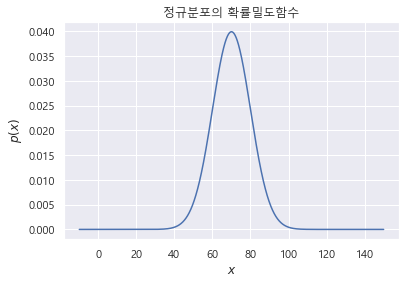

In [11]:
#정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

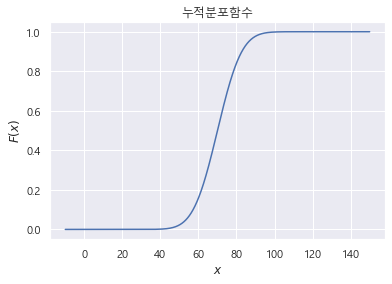

In [13]:
#누적분포함수
s_cdf = norm.cdf(s_x)

#누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [14]:
#기대값이 0이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
#구간 내에 숫자를 균일한 간격으로 생성 (X축)
#-10~150까지 2000개 생성
sn_x = np.linspace(-5, 5, 1000)

#확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

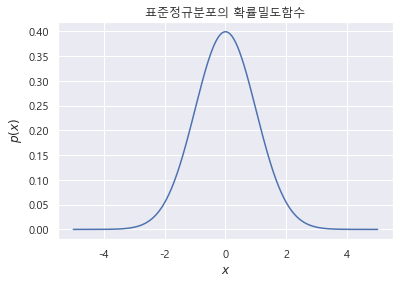

In [15]:
#정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [18]:
#랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)
n_data.shape

(1000,)

In [21]:
#n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 49.456
standard deviation: 28.822214765697655


In [22]:
#확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale=n_std)
n_pdf = norm_n_data.pdf(n_data)
n_data.shape

(1000,)

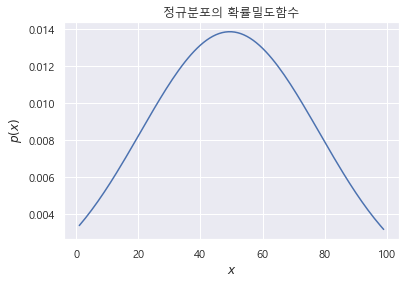

In [23]:
#정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [24]:
#표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data :
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [26]:
#표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

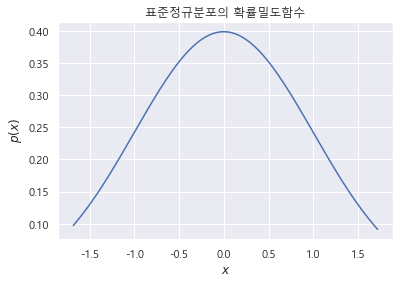

In [27]:
#표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [28]:
#카이제곱분포 표현
from scipy.stats import chi2

In [29]:
#라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

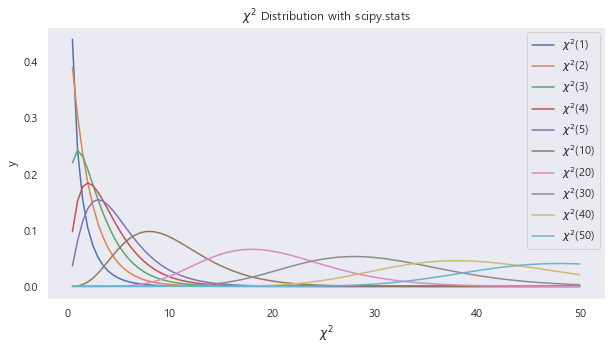

In [32]:
#자유도에 따른 카이제곱분포 시각화
plt.figure(figsize = (10, 5))
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label=r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [33]:
#카이제곱분포를 이용한 적합성 검정
#한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
#교차분석표 생성 (자유도 2)

#관찰도수
x_o = [324, 78, 261]
#기대도수
x_e = [371, 80, 212]

#지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e],
                          columns = ['서울', '인천', '대구'],
                          index = ['관찰도수', '기대도수'])

In [34]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [35]:
#카이제곱 통계량 계싼
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

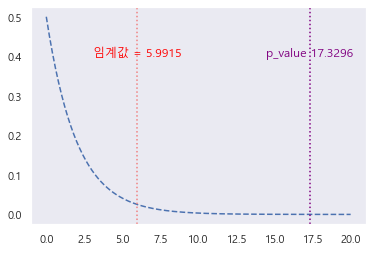

In [41]:
#위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

dof = 2
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

#유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

#95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
         horizontalalignment='center', color = 'red')

#위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=":")
plt.text(result[0], .4, 'p_value '+ str(round(result[0], 4)),
         horizontalalignment='center', color = 'purple')
plt.grid()
plt.show()